In [26]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
import utilities
import importlib
importlib.reload(utilities)
from sklearn.linear_model import LogisticRegression

In [28]:
df = pd.read_csv('Resources/Customer-Churn-Records.csv')

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [30]:
# Initialize LogisticRegression
lr_model = LogisticRegression()

In [31]:
scores = utilities.processData(df, lr_model)

Accuracy Score: 0.812
Balanced accuracy Score: 0.5831405539695131
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000

auc Score:  0.7785895359202978


print(scores)

In [32]:
# Create a a list to store accuracy values
balanced_accuracy = []
accuracy = []

# Create a a list to store the values of k
k = list(range(1, 20))


#for i in k:
lr_model = LogisticRegression()
scores = utilities.processData(df, lr_model)
balanced_accuracy.append(scores['balanced_accuracy_score'])
accuracy.append(scores['accuracy_score'])
   

Accuracy Score: 0.812
Balanced accuracy Score: 0.5831405539695131
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000

auc Score:  0.7785895359202978


Exited
0    7962
1    2038
Name: count, dtype: int64


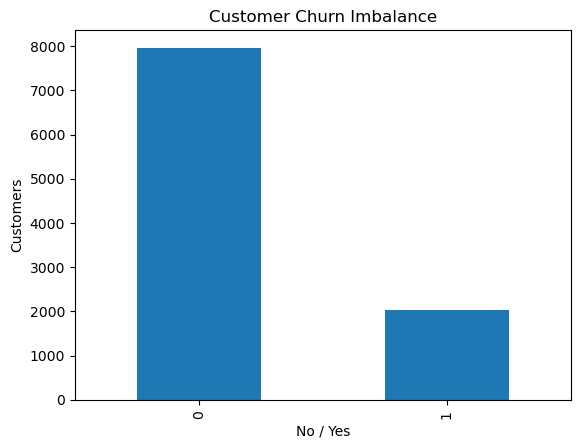

In [33]:
import matplotlib.pyplot as plt
class_distribution = df['Exited'].value_counts()
print(class_distribution)

class_distribution.plot(kind='bar')
plt.title('Customer Churn Imbalance')
plt.xlabel('No / Yes')
plt.ylabel('Customers')
plt.show()

In [34]:
majority_class = class_distribution.max()
minority_class = class_distribution.min()
imbalance_ratio = majority_class / minority_class
print(f'Imbalance Ratio: {imbalance_ratio}')

Imbalance Ratio: 3.9067713444553482


In [35]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

In [37]:
from sklearn.model_selection import GridSearchCV

#scores_gscv = utilities.processData(df, grid_search)
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='balanced_accuracy')
scores_gscv = utilities.processData(df, grid_search)
print("Best parameters found: ", grid_search.best_params_)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn

Accuracy Score: 0.8115
Balanced accuracy Score: 0.5828294152016227
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000

auc Score:  0.7787003741582231
Best parameters found:  {'C': 10, 'solver': 'liblinear'}
